# Import all libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Function to generate data

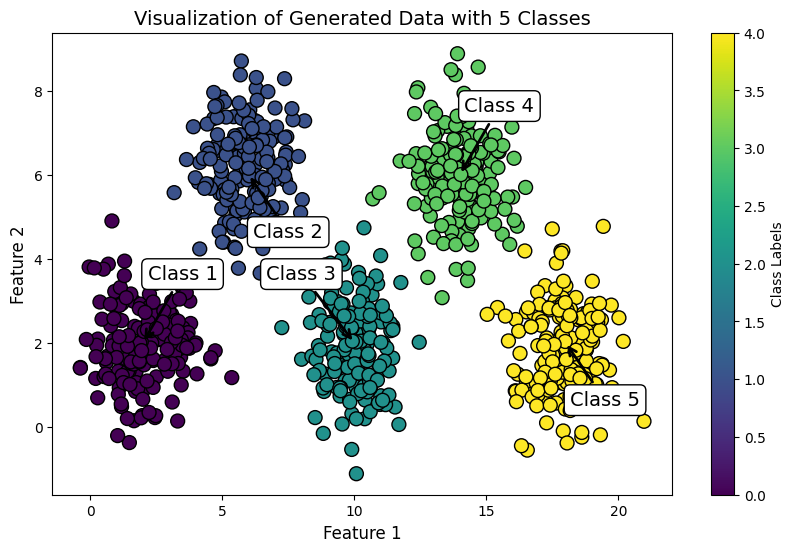

In [17]:
# Function to generate data for 5 classes
def generate_data(samples_per_class=180):
    np.random.seed(32)
    # Class centers for 5 classes
    class1 = np.random.randn(samples_per_class, 2) + np.array([2, 2])
    class2 = np.random.randn(samples_per_class, 2) + np.array([6, 6])
    class3 = np.random.randn(samples_per_class, 2) + np.array([10, 2])
    class4 = np.random.randn(samples_per_class, 2) + np.array([14, 6])
    class5 = np.random.randn(samples_per_class, 2) + np.array([18, 2])

    # Combine the data
    X = np.vstack([class1, class2, class3, class4, class5])
    y = np.array([0] * samples_per_class + [1] * samples_per_class +
                  [2] * samples_per_class + [3] * samples_per_class + [4] * samples_per_class)

    return X, y

# Generate data
X, y = generate_data()

# Encode the classes using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=32)

# Plot the generated data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=100, edgecolor="k")

# Class centers for annotations
centers = [(2, 2), (6, 6), (10, 2), (14, 6), (18, 2)]  # Updated centers for 5 classes
offsets = [(1.5, 1.5), (1.5, -1.5), (-2, 1.5), (1.5, 1.5), (1.5, -1.5)]  # Offset for better placement

for i, (center, offset) in enumerate(zip(centers, offsets)):
    plt.annotate(f'Class {i + 1}',
                 xy=center,
                 xytext=(center[0] + offset[0], center[1] + offset[1]),
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=2),
                 fontsize=14,
                 color="black",
                 ha="center",
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Adding plot details
plt.title("Visualization of Generated Data with 5 Classes", fontsize=14)
plt.colorbar(scatter, label="Class Labels")
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.show()


A function to generate synthetic data for five classes, each with two features. First, random data points are created for each class, with each class being centered around specific points (e.g., Class 1 around \[2, 2], Class 2 around \[6, 6], etc.). The data points are then combined to form the final dataset, which is split into training, validation, and test sets. OneHotEncoder is used to encode the class labels. The data is then visualized using a scatter plot, where each class is represented by different colors. The scatter plot helps in visualizing how well the classes are separated based on the features.

In the second code block, the data visualization is enhanced by adding annotations for the centers of each class. These annotations are placed near the center of each class cluster on the plot for better clarity. A color bar is included to indicate class labels. This output shows a clear separation of the five classes, each identified with its own color, and annotations labeling the classes directly on the plot. The plot is well-formatted with titles and labels for axes, making it visually informative for interpreting the data distribution. The generated plot helps assess how distinct and well-separated the different classes are in the feature space.


In [18]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training, validation, and test sets

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=32)

# Print the sizes of the splits

In [20]:
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 540 samples
Validation set: 180 samples
Test set: 180 samples


# Define the custom neural network class

In [21]:
class NeuralNet:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, lr):
        # Initialize weights for all layers
        self.W1 = np.random.randn(input_size, hidden_size1)  # Input to Hidden Layer 1
        self.W2 = np.random.randn(hidden_size1, hidden_size2)  # Hidden Layer 1 to Hidden Layer 2
        self.W3 = np.random.randn(hidden_size2, hidden_size3)  # Hidden Layer 2 to Hidden Layer 3
        self.W4 = np.random.randn(hidden_size3, output_size)  # Hidden Layer 3 to Output Layer
        self.lr = lr

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feed_forward(self, x):
        # Layer 1
        self.hidden_input1 = np.dot(x, self.W1)
        self.hidden_output1 = self.sigmoid(self.hidden_input1)

        # Layer 2
        self.hidden_input2 = np.dot(self.hidden_output1, self.W2)
        self.hidden_output2 = self.sigmoid(self.hidden_input2)

        # Layer 3
        self.hidden_input3 = np.dot(self.hidden_output2, self.W3)
        self.hidden_output3 = self.sigmoid(self.hidden_input3)

        # Output Layer
        self.output_input = np.dot(self.hidden_output3, self.W4)
        self.output = self.sigmoid(self.output_input)
        return self.output

    def backprop(self, x, y, output):
        # Output Layer Error
        output_error = y - output
        output_delta = output_error * self.sigmoid(output, derivative=True)

        # Hidden Layer 3 Error
        hidden_error3 = np.dot(output_delta, self.W4.T)
        hidden_delta3 = hidden_error3 * self.sigmoid(self.hidden_output3, derivative=True)

        # Hidden Layer 2 Error
        hidden_error2 = np.dot(hidden_delta3, self.W3.T)
        hidden_delta2 = hidden_error2 * self.sigmoid(self.hidden_output2, derivative=True)

        # Hidden Layer 1 Error
        hidden_error1 = np.dot(hidden_delta2, self.W2.T)
        hidden_delta1 = hidden_error1 * self.sigmoid(self.hidden_output1, derivative=True)

        # Update weights
        self.W4 += np.dot(self.hidden_output3.T, output_delta) * self.lr
        self.W3 += np.dot(self.hidden_output2.T, hidden_delta3) * self.lr
        self.W2 += np.dot(self.hidden_output1.T, hidden_delta2) * self.lr
        self.W1 += np.dot(x.T, hidden_delta1) * self.lr

    def train(self, x, y):
        output = self.feed_forward(x)
        self.backprop(x, y, output)

A custom neural network class `NeuralNet` and implements the forward propagation and backpropagation processes essential for training a multi-layer perceptron. The network consists of three hidden layers, each with its respective weight matrix. The `sigmoid` activation function is used throughout the network. During the forward pass, input data is passed through the network, undergoing matrix multiplication at each layer to generate output values, which are subsequently passed through the sigmoid function to introduce non-linearity. The backpropagation method computes the error at the output layer, propagates this error backward through the network to adjust the weights, and applies gradient descent to minimize the error.

The backpropagation process involves computing the error at the output layer and then working backward through the hidden layers. The error is propagated by calculating the gradients with respect to the weights and updating them in the direction that reduces the error. The weight update process is controlled by a learning rate (`lr`), ensuring that the network converges slowly and steadily without overshooting the optimal solution. The code also features a training method that performs one forward pass and one backward pass on a given set of input data, allowing the network to learn and improve its predictions iteratively.


# Train the Neural Network

In [91]:
input_size = X_train.shape[1]
hidden_size1 = 15  # Neurons in the first hidden layer
hidden_size2 = 15  # Neurons in the second hidden layer
hidden_size3 = 15  # Neurons in the third hidden layer
output_size = y_train.shape[1]  # Number of output classes
lr = 0.001  # Learning rate
epochs = 900

nn = NeuralNet(input_size, hidden_size1, hidden_size2, hidden_size3, output_size, lr)
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    nn.train(X_train, y_train)
    train_output = nn.feed_forward(X_train)
    val_output = nn.feed_forward(X_val)

    # Compute loss
    train_loss = np.mean((y_train - train_output) ** 2)
    val_loss = np.mean((y_val - val_output) ** 2)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Compute accuracy
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_output, axis=1))
    val_accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(val_output, axis=1))
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}, "
              f"Train Accuracy = {train_accuracy * 100:.2f}%, Validation Accuracy = {val_accuracy * 100:.2f}%")


Epoch 0: Train Loss = 0.3786, Validation Loss = 0.3798, Train Accuracy = 19.44%, Validation Accuracy = 21.67%
Epoch 50: Train Loss = 0.1518, Validation Loss = 0.1534, Train Accuracy = 41.85%, Validation Accuracy = 40.00%
Epoch 100: Train Loss = 0.1415, Validation Loss = 0.1443, Train Accuracy = 42.59%, Validation Accuracy = 37.78%
Epoch 150: Train Loss = 0.1316, Validation Loss = 0.1345, Train Accuracy = 43.15%, Validation Accuracy = 38.33%
Epoch 200: Train Loss = 0.1217, Validation Loss = 0.1246, Train Accuracy = 60.56%, Validation Accuracy = 56.11%
Epoch 250: Train Loss = 0.1124, Validation Loss = 0.1153, Train Accuracy = 66.67%, Validation Accuracy = 66.11%
Epoch 300: Train Loss = 0.1031, Validation Loss = 0.1056, Train Accuracy = 65.19%, Validation Accuracy = 64.44%
Epoch 350: Train Loss = 0.0973, Validation Loss = 0.1000, Train Accuracy = 66.11%, Validation Accuracy = 63.33%
Epoch 400: Train Loss = 0.0934, Validation Loss = 0.0964, Train Accuracy = 67.78%, Validation Accuracy = 64

Neural network model is trained using the `train` method defined earlier. The network has an input layer, three hidden layers, and an output layer. The model is trained for 900 epochs with a learning rate of 0.001. During each epoch, the model computes the training and validation losses using the Mean Squared Error (MSE) formula, and the accuracy is calculated using the `accuracy_score` function. The losses and accuracies for both the training and validation sets are recorded at each epoch and are appended to their respective lists (`train_losses`, `val_losses`, `train_accuracies`, `val_accuracies`).

The training progress is displayed every 50 epochs, showing the current epoch number, training loss, validation loss, training accuracy, and validation accuracy. The results show the training and validation losses and accuracies, giving insight into how well the model is performing at each step of the training process. For example, the printed output displays how the model's performance improves over time, with losses decreasing and accuracies increasing. The process helps in monitoring the model's learning and ensures that the network is converging to an optimal solution.


# Visualize Loss and Accuracy

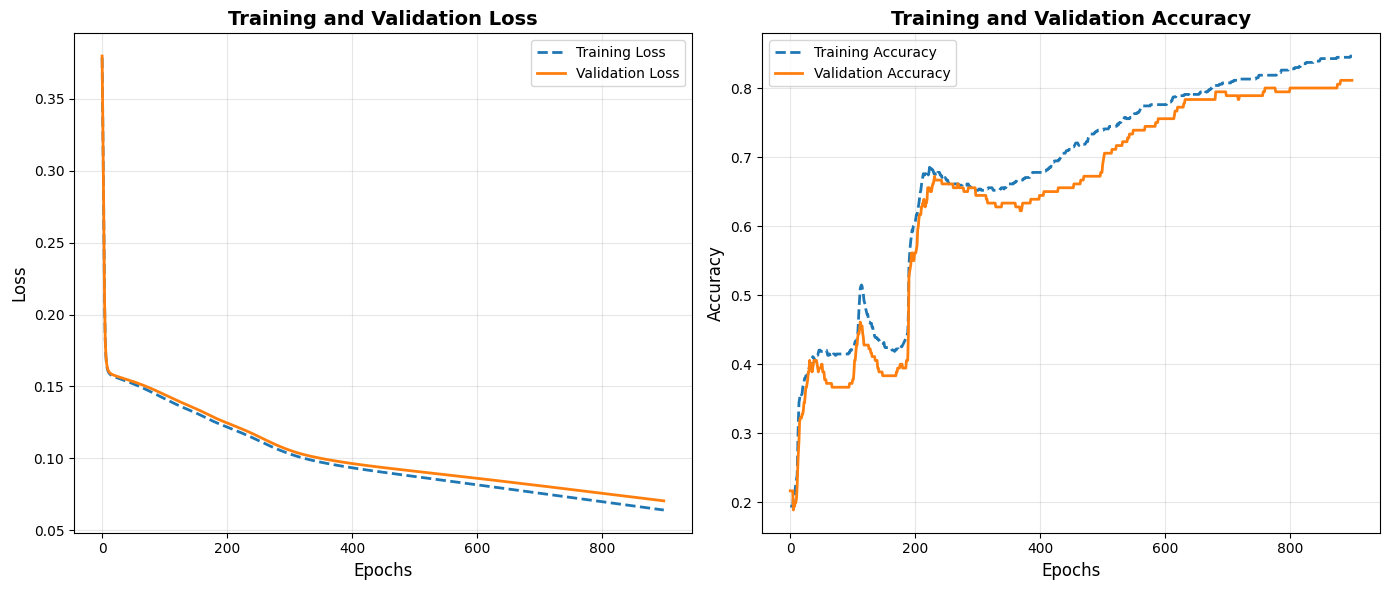

In [92]:
plt.figure(figsize=(14, 6))

# Subplot 1: Training and Validation Loss

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss", linestyle='--', linewidth=2)
plt.plot(val_losses, label="Validation Loss", linestyle='-', linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)


# Subplot 2: Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy", linestyle='--', linewidth=2)
plt.plot(val_accuracies, label="Validation Accuracy", linestyle='-', linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)


# Adjust layout for better presentation
plt.tight_layout()
plt.show()


**Training and Validation Loss**

**Training Loss:**

The training loss begins relatively high at the start of the epochs and decreases sharply in the early stages, which is a typical pattern. This indicates that the model is learning quickly and effectively on the training data.

As the number of epochs increases, the loss stabilizes and decreases more gradually. This signifies that the model has learned the majority of the underlying patterns in the training data, but further improvements in accuracy are harder to achieve without more training or adjustments to the model architecture.

**Validation Loss:**

The validation loss starts high like the training loss but decreases more slowly in comparison.

There are some fluctuations in the validation loss curve. This suggests that while the model is improving, it may not generalize as well as it learns from the training data. The model may be overfitting, where it performs very well on the training set but struggles with unseen data.

Convergence of Loss: While the training loss continues to drop, the validation loss eventually becomes almost constant, which is an indicator that the model's performance on validation data has plateaued.

**Training and Validation Accuracy**

**Training Accuracy:**

The training accuracy shows rapid improvement in the beginning, especially during the early epochs. This is consistent with the fast drop in training loss.

After reaching a certain point, the training accuracy stabilizes, indicating that the model has learned the core patterns in the training data. However, further improvement is gradual.

**Validation Accuracy:**

The validation accuracy starts off lower than the training accuracy but increases as the epochs progress, following a similar pattern to the training accuracy.

Initially, the validation accuracy improves at a slower rate compared to the training accuracy. This is normal, but as the model learns, the gap between training accuracy and validation accuracy becomes more evident, which suggests that the model is overfitting. Validation accuracy lags behind training accuracy after the initial epochs, pointing to a potential mismatch in generalization to unseen data.



# Evaluate the Model

In [93]:
test_output = nn.feed_forward(X_test)
predicted_classes = np.argmax(test_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Compute accuracy

In [94]:
test_accuracy = accuracy_score(actual_classes, predicted_classes)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 85.56%


# Plot Actual Vs Predicted

<ipython-input-95-491083b7b9c4>:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_actual = plt.scatter(X_test[:, 0], X_test[:, 1],


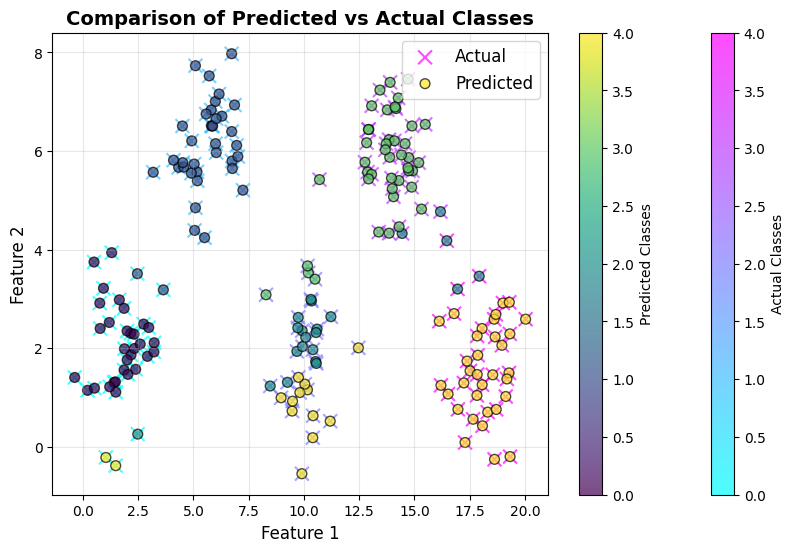

In [95]:
predicted_output = nn.feed_forward(X_test)

# Convert predicted output and actual labels to class labels
predicted_classes = np.argmax(predicted_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Visualize the Comparison using different colors and markers for better distinction
plt.figure(figsize=(10, 6))

# Create a scatter plot for actual classes using color coding
scatter_actual = plt.scatter(X_test[:, 0], X_test[:, 1],
                             c=actual_classes, cmap='cool',
                             s=100, marker='x', alpha=0.7, edgecolor='k', label='Actual')

# Overlay predicted classes with different color map and marker
scatter_predicted = plt.scatter(X_test[:, 0], X_test[:, 1],
                                c=predicted_classes, cmap='viridis',
                                s=50, marker='o', alpha=0.7, edgecolor='k', label='Predicted')

# Add plot details and labels
plt.title("Comparison of Predicted vs Actual Classes", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Add legend for clarity
plt.legend(loc="best", fontsize=12)

# Display a grid for better readability
plt.grid(True, alpha=0.3)

# Add colorbar to map the color to class labels
plt.colorbar(scatter_actual, label="Actual Classes")
plt.colorbar(scatter_predicted, label="Predicted Classes")

# Show the plot
plt.show()


The scatter plot visualizes the predicted vs. actual classes for a 5-class classification problem using two features: Feature 1 (x-axis) and Feature 2 (y-axis). The points are color-coded to represent the different classes, and the markers are distinguished by shape: **cross markers (x)** for actual classes and **circle markers (o)** for predicted classes. Each class occupies a distinct region on the plot, with some overlap between neighboring classes, indicating areas where the model struggles to distinguish between certain classes. The **decision boundaries**, represented by background colors, show where the model predicts each class based on the feature values.

While the predicted classes generally align well with the actual classes, some misclassifications can be observed in regions where the class boundaries overlap. These misclassifications occur particularly near the borders of the decision regions, suggesting that the model finds it difficult to distinguish between similar classes in those areas. The model performs well overall, but the **overlapping regions** suggest that additional techniques like **feature engineering** or more advanced models could improve the separation between classes and reduce errors in prediction.


# Decision Boundary Plot

<ipython-input-96-d34ad1fe5fdd>:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=actual_classes, cmap='cool', s=100, marker='x', alpha=0.7, edgecolor='k', label='Actual')


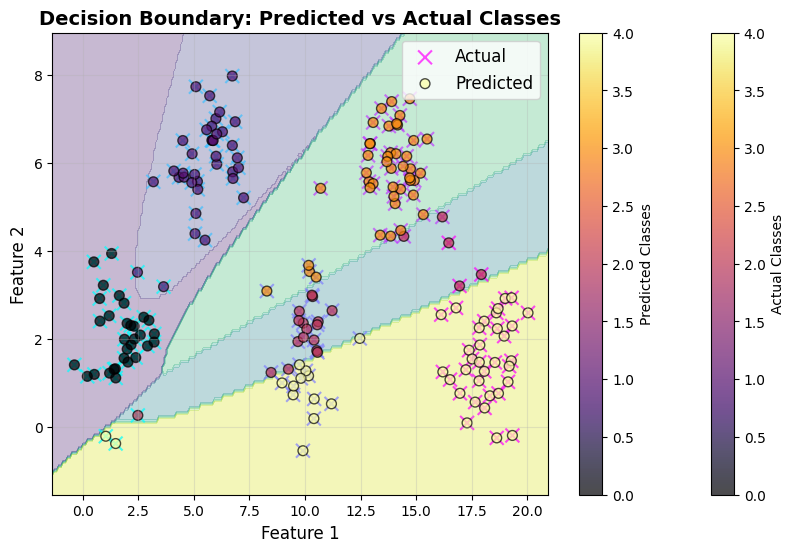

In [96]:
# Predict output from the neural network
predicted_output = nn.feed_forward(X_test)

# Convert predicted output and actual labels to class labels
predicted_classes = np.argmax(predicted_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Generate meshgrid for decision boundary plotting
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid to visualize decision boundary
Z = np.argmax(nn.feed_forward(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)

# Visualize the comparison using contour plot and scatter plot
plt.figure(figsize=(10, 6))

# Plot decision boundary (contour plot)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Scatter plot for actual test classes
plt.scatter(X_test[:, 0], X_test[:, 1], c=actual_classes, cmap='cool', s=100, marker='x', alpha=0.7, edgecolor='k', label='Actual')

# Overlay predicted classes using a different marker and color map
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_classes, cmap='inferno', s=50, marker='o', alpha=0.7, edgecolor='k', label='Predicted')

# Add plot details and labels
plt.title("Decision Boundary: Predicted vs Actual Classes", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Add legend for clarity
plt.legend(loc="best", fontsize=12)

# Display grid for better readability
plt.grid(True, alpha=0.3)

# Add colorbars for both actual and predicted classes
plt.colorbar(label="Actual Classes")
plt.colorbar(label="Predicted Classes")

# Show the plot
plt.show()

The scatter plot shows the comparison between **predicted and actual classes** for a 5-class classification problem, with each class represented by a unique color. The **actual classes** are marked with cross markers (x), while the **predicted classes** are indicated by circular markers (o). The **decision boundaries** are added, represented by background colors that show the regions where the model predicts each class based on feature values. These boundaries reflect the thresholds at which the model changes its predictions from one class to another, and they provide insight into how well the model is able to separate the classes within the feature space.

Overall, the plot demonstrates that the model performs well, with most of the predicted classes aligning closely with the actual classes. However, there are some **misclassifications** near the decision boundaries where the predicted markers do not match the actual ones. This suggests that the model faces difficulty in distinguishing between certain classes in overlapping regions. The decision boundaries appear relatively smooth, but the model's performance could be enhanced by addressing these areas of overlap, potentially through **model refinement**, **regularization**, or **better feature engineering**.
